# Diabetes prediction system

Import libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve,auc
import joblib

load dataset

In [7]:
# upload the daataset
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


getting the shpae of dataset

In [ ]:
df.shape #(rows,cols)

(100000, 9)

Check dataset information

In [8]:
df.info()
df.describe()
df.isnull().sum() #Check missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


There are  all zeros. So, no missing values

Encode categorial columns

In [9]:
#Apply label encoder to categorial values
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])

le_smoke = LabelEncoder()
df['smoking_history'] = le_smoke.fit_transform(df['smoking_history'])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


Feature Scaling

In [10]:
# numerical columns without binary values
num_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

# apply standard scaler to numerical cols
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.692704,0,1,4,-0.321056,1.001706,0.047704,0
1,0,0.538006,0,0,0,-0.000116,1.001706,-1.426210,0
2,1,-0.616691,0,0,4,-0.000116,0.161108,0.489878,0
3,0,-0.261399,0,0,1,-0.583232,-0.492690,0.416183,0
4,1,1.515058,1,1,1,-1.081970,-0.679490,0.416183,0


Split the data

In [11]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

#divide datatset for 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(80000, 8)
(20000, 8)


Training the model

In [12]:
#Model 1 - Logistic regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))

Accuracy: 0.95875
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



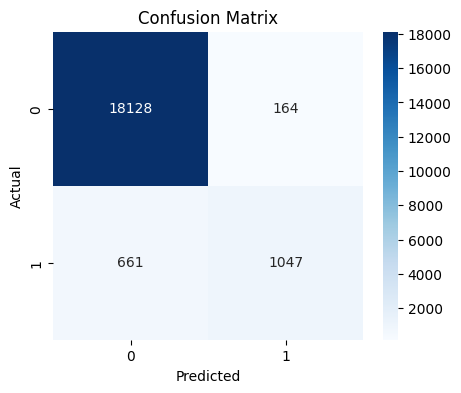

In [13]:
cm = confusion_matrix(y_test, lr_y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [14]:
#Model 2 - Random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

Accuracy: 0.97065
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



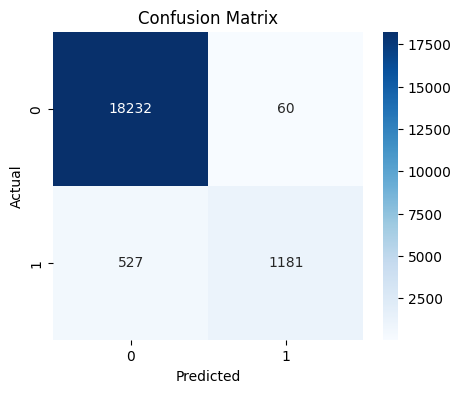

In [15]:
cm = confusion_matrix(y_test, rf_y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [16]:
#Model 3 - Decison tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, dt_y_pred))
print(classification_report(y_test,dt_y_pred))

Accuracy: 0.95225
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.71      0.74      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.84      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000



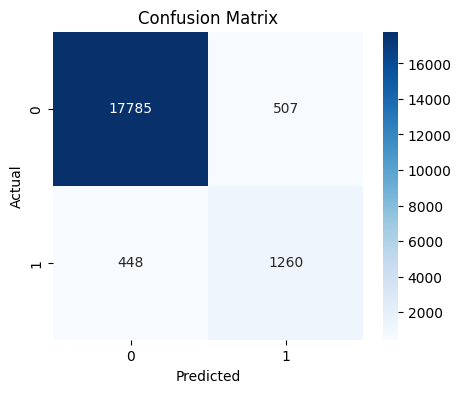

In [17]:
cm = confusion_matrix(y_test, dt_y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
#Model 4 - K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))

Accuracy: 0.96095
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.90      0.61      0.73      1708

    accuracy                           0.96     20000
   macro avg       0.93      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



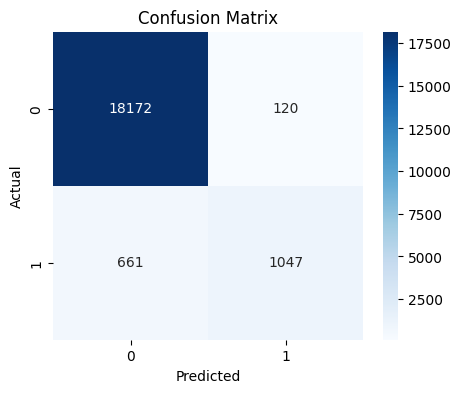

In [19]:
cm = confusion_matrix(y_test, knn_y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
#Model 5 - Neural Network (MLP)
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # 2 hidden layers
    activation='relu',   #avoid vanishing gradient
    solver='adam',  #best optimizer for neural networks
    max_iter=500,
    random_state=42)

mlp.fit(X_train, y_train)
mlp_y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, mlp_y_pred))
print(classification_report(y_test, mlp_y_pred))

Accuracy: 0.9709
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.85      0.89     20000
weighted avg       0.97      0.97      0.97     20000



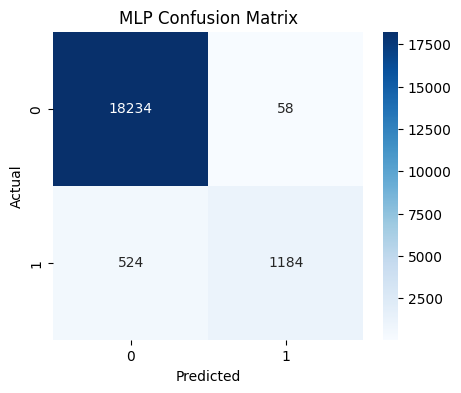

In [21]:
cm = confusion_matrix(y_test, mlp_y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("MLP Confusion Matrix")
plt.show()

In [22]:
#Model 6 - Support Vector Machine
svm = SVC(random_state=42,probability=True)
svm.fit(X_train, y_train)
svm_y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))

Accuracy: 0.9622
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.99      0.56      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.98      0.78      0.85     20000
weighted avg       0.96      0.96      0.96     20000



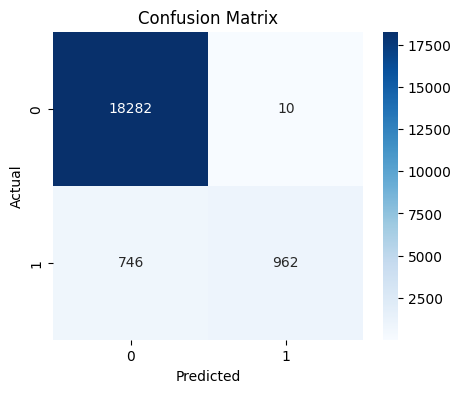

In [23]:
cm = confusion_matrix(y_test, svm_y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

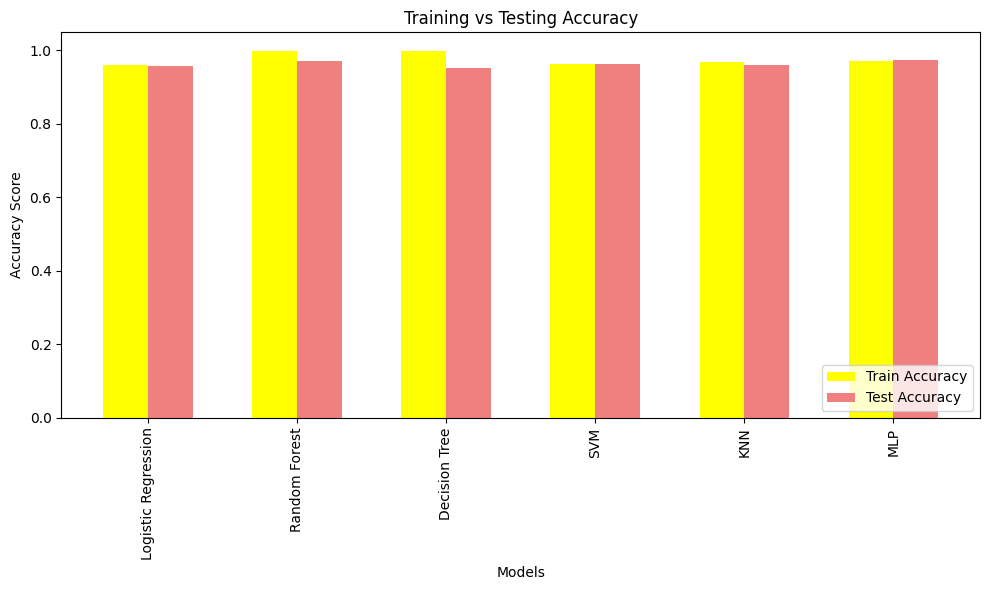

In [24]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "MLP": MLPClassifier(random_state=42)}

train_acc_vals = []
test_acc_vals = []
model_names = []

for name, model in models.items():
    model.fit(X_train, y_train)

    #Accuracy of training
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)

    #Accuracy of testing
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)

    model_names.append(name)
    train_acc_vals.append(train_acc)
    test_acc_vals.append(test_acc)

# Comparison Plot
plt.figure(figsize=(10, 6))
x = np.arange(len(model_names))
width = 0.3
plt.bar(x - width/2, train_acc_vals, width, label='Train Accuracy', color='yellow')
plt.bar(x + width/2, test_acc_vals, width, label='Test Accuracy', color='lightcoral')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Training vs Testing Accuracy')
plt.xticks(x, model_names, rotation=90)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
plt.close()

According to the graph, SVM has almost same training and testing accuracy. So, i choose SVM for this project over other algorithms even though they have high accuracy.

In [26]:
#ROC curve for SVM
y_prob_svm = svm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)


PLot trhe ROC curve

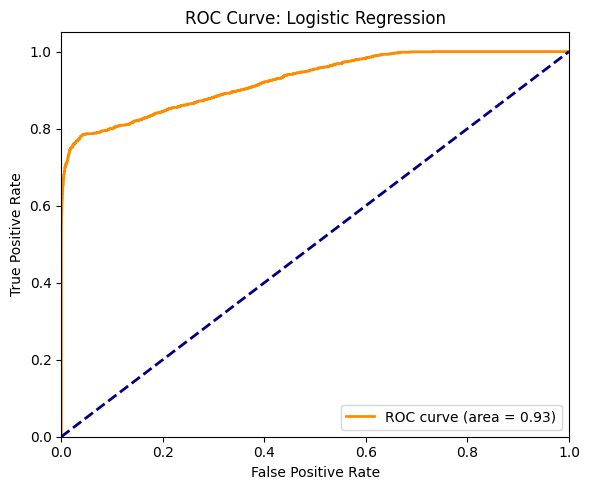

In [27]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('roc_curve_lr.png')
plt.show()
plt.close()

In [28]:
# Save the SVM model
best_model = svm
joblib.dump(best_model, 'diabetes_disease_model.pkl')

#save the Scaler to reuse
scaler = StandardScaler()
scaler.fit(df[num_features])
joblib.dump(scaler, 'scaler.pkl')

# Save the column names
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')

['model_columns.pkl']